### reading predicted and original values (this is open public data)
#### to make it harder we didnt just predicted only the missed data but we have reconstructed all the data with our model 

In [1]:
import pandas as pd 
from pandas import read_csv
import matplotlib.pyplot as plt
def read_prepare(path,sep=',',src='predict'):
    df=pd.read_csv(path,sep)
    df=df.melt(id_vars=['Depth (m)'], var_name='time', value_name='temperature')
    df.columns=['depth','time',src]
    return df

In [2]:
base_path='/home/osman/aramko/tsy/'
forwrd_prediction=read_prepare(base_path+"forwrd_predict.csv")
backwrd_prediction=read_prepare(base_path+"backward_predict.csv")
forwrd_fact=read_prepare(base_path+'forwrd_fact.csv','|','fact')
backward_fact=read_prepare(base_path+'backward_fact.csv','|','fact')

### take only needed fact time window by joining with prediction 

In [3]:
forward=forwrd_prediction.merge(forwrd_fact,on=['depth','time'],how='inner').sort_values(['depth','time'])
backward=backwrd_prediction.merge(backward_fact,on=['depth','time'],how='inner')

In [4]:
import matplotlib.patches as mpatches
import pylab as plot
params = {'legend.fontsize': 26,
          'legend.handlelength': 1,
         'font.size': 28}
plot.rcParams.update(params)
from sklearn.metrics.pairwise import cosine_similarity as  cs ,manhattan_distances as L1,euclidean_distances as L2
import numpy as np
def draw_scores(df,steps=100,fs=5):
    stepit=list(range(0, len(df['depth'].drop_duplicates().values),steps))
    fig, axes = plt.subplots(nrows=int(len(stepit)/3), ncols=3)
    for i in range(len(stepit)):
        tmp=df[df.depth==df['depth'].drop_duplicates().values[stepit[i]]].copy().reset_index()
        tmp[['fact','predict']].plot(ax=axes.flatten()[i],figsize=(55,90))
        handles, labels = axes.flatten()[i].get_legend_handles_labels()
        handles.append(mpatches.Patch(color='none', label='depth='+str(tmp['depth'][0])))
        fct=tmp['fact'].values.reshape(1, -1)
        prd=tmp['predict'].values.reshape(1, -1)
        text='L1='+str(1-(L1(fct,prd)[0][0])/len(tmp['fact']))[:fs]+'\nL2='+str(1-(L2(fct,prd)[0][0])/len(tmp['fact']))[:fs]+'\nCosin='+str((cs(fct,prd)[0][0]))[:fs]
        axes.flatten()[i].text(0.6,0.01,text,transform=axes.flatten()[i].transAxes, bbox=dict(facecolor='none',edgecolor='black',boxstyle='square')) 
        axes.flatten()[i].legend(handles=handles)
    return plt

score for L1 0.6264869874470667
score for L2 0.9995462407642475
score for CS 0.9999989706508493


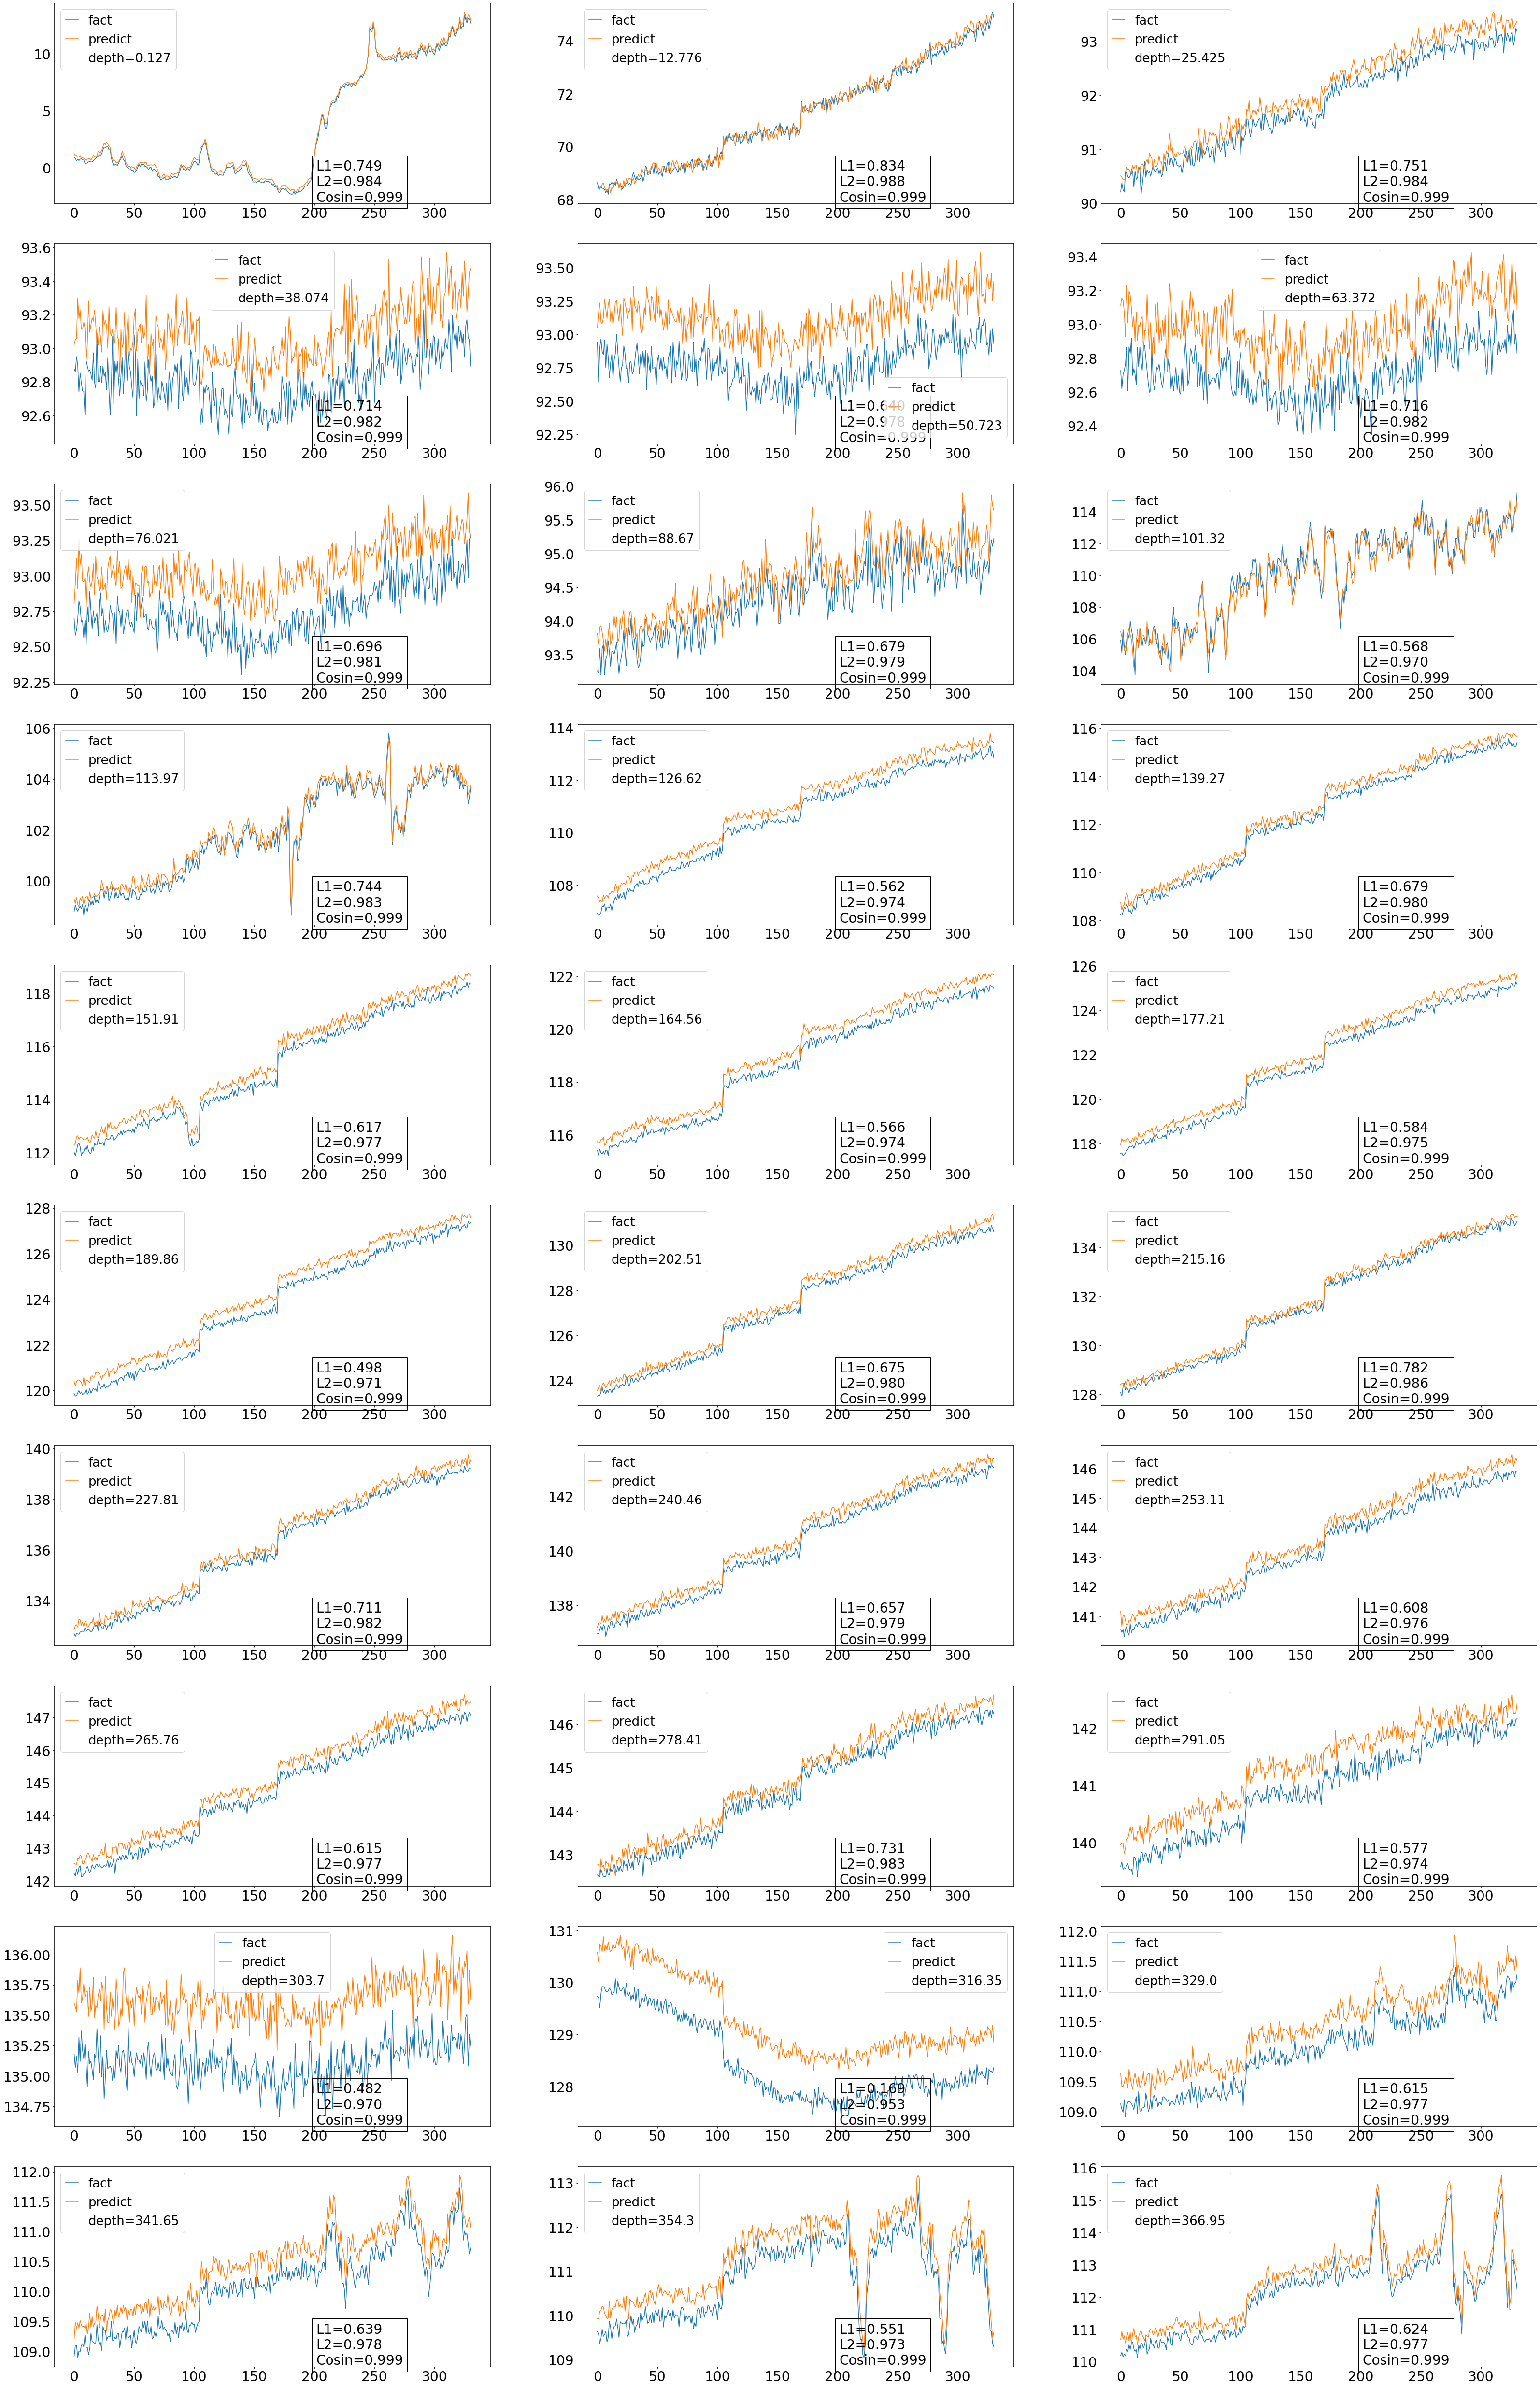

In [18]:
fct=backward['fact'].values.reshape(1, -1)
prd=backward['predict'].values.reshape(1, -1)
print('score for L1',1-(L1(fct,prd)[0][0])/len(backward))
print('score for L2',1-(L2(fct,prd)[0][0])/len(backward))
print('score for CS',1-(cs(fct,prd)[0][0])/len(backward))
draw_scores(backward).show()

score for L1 0.5955577485724404
score for L2 0.9995490875811648
score for CS 0.9999992688548526


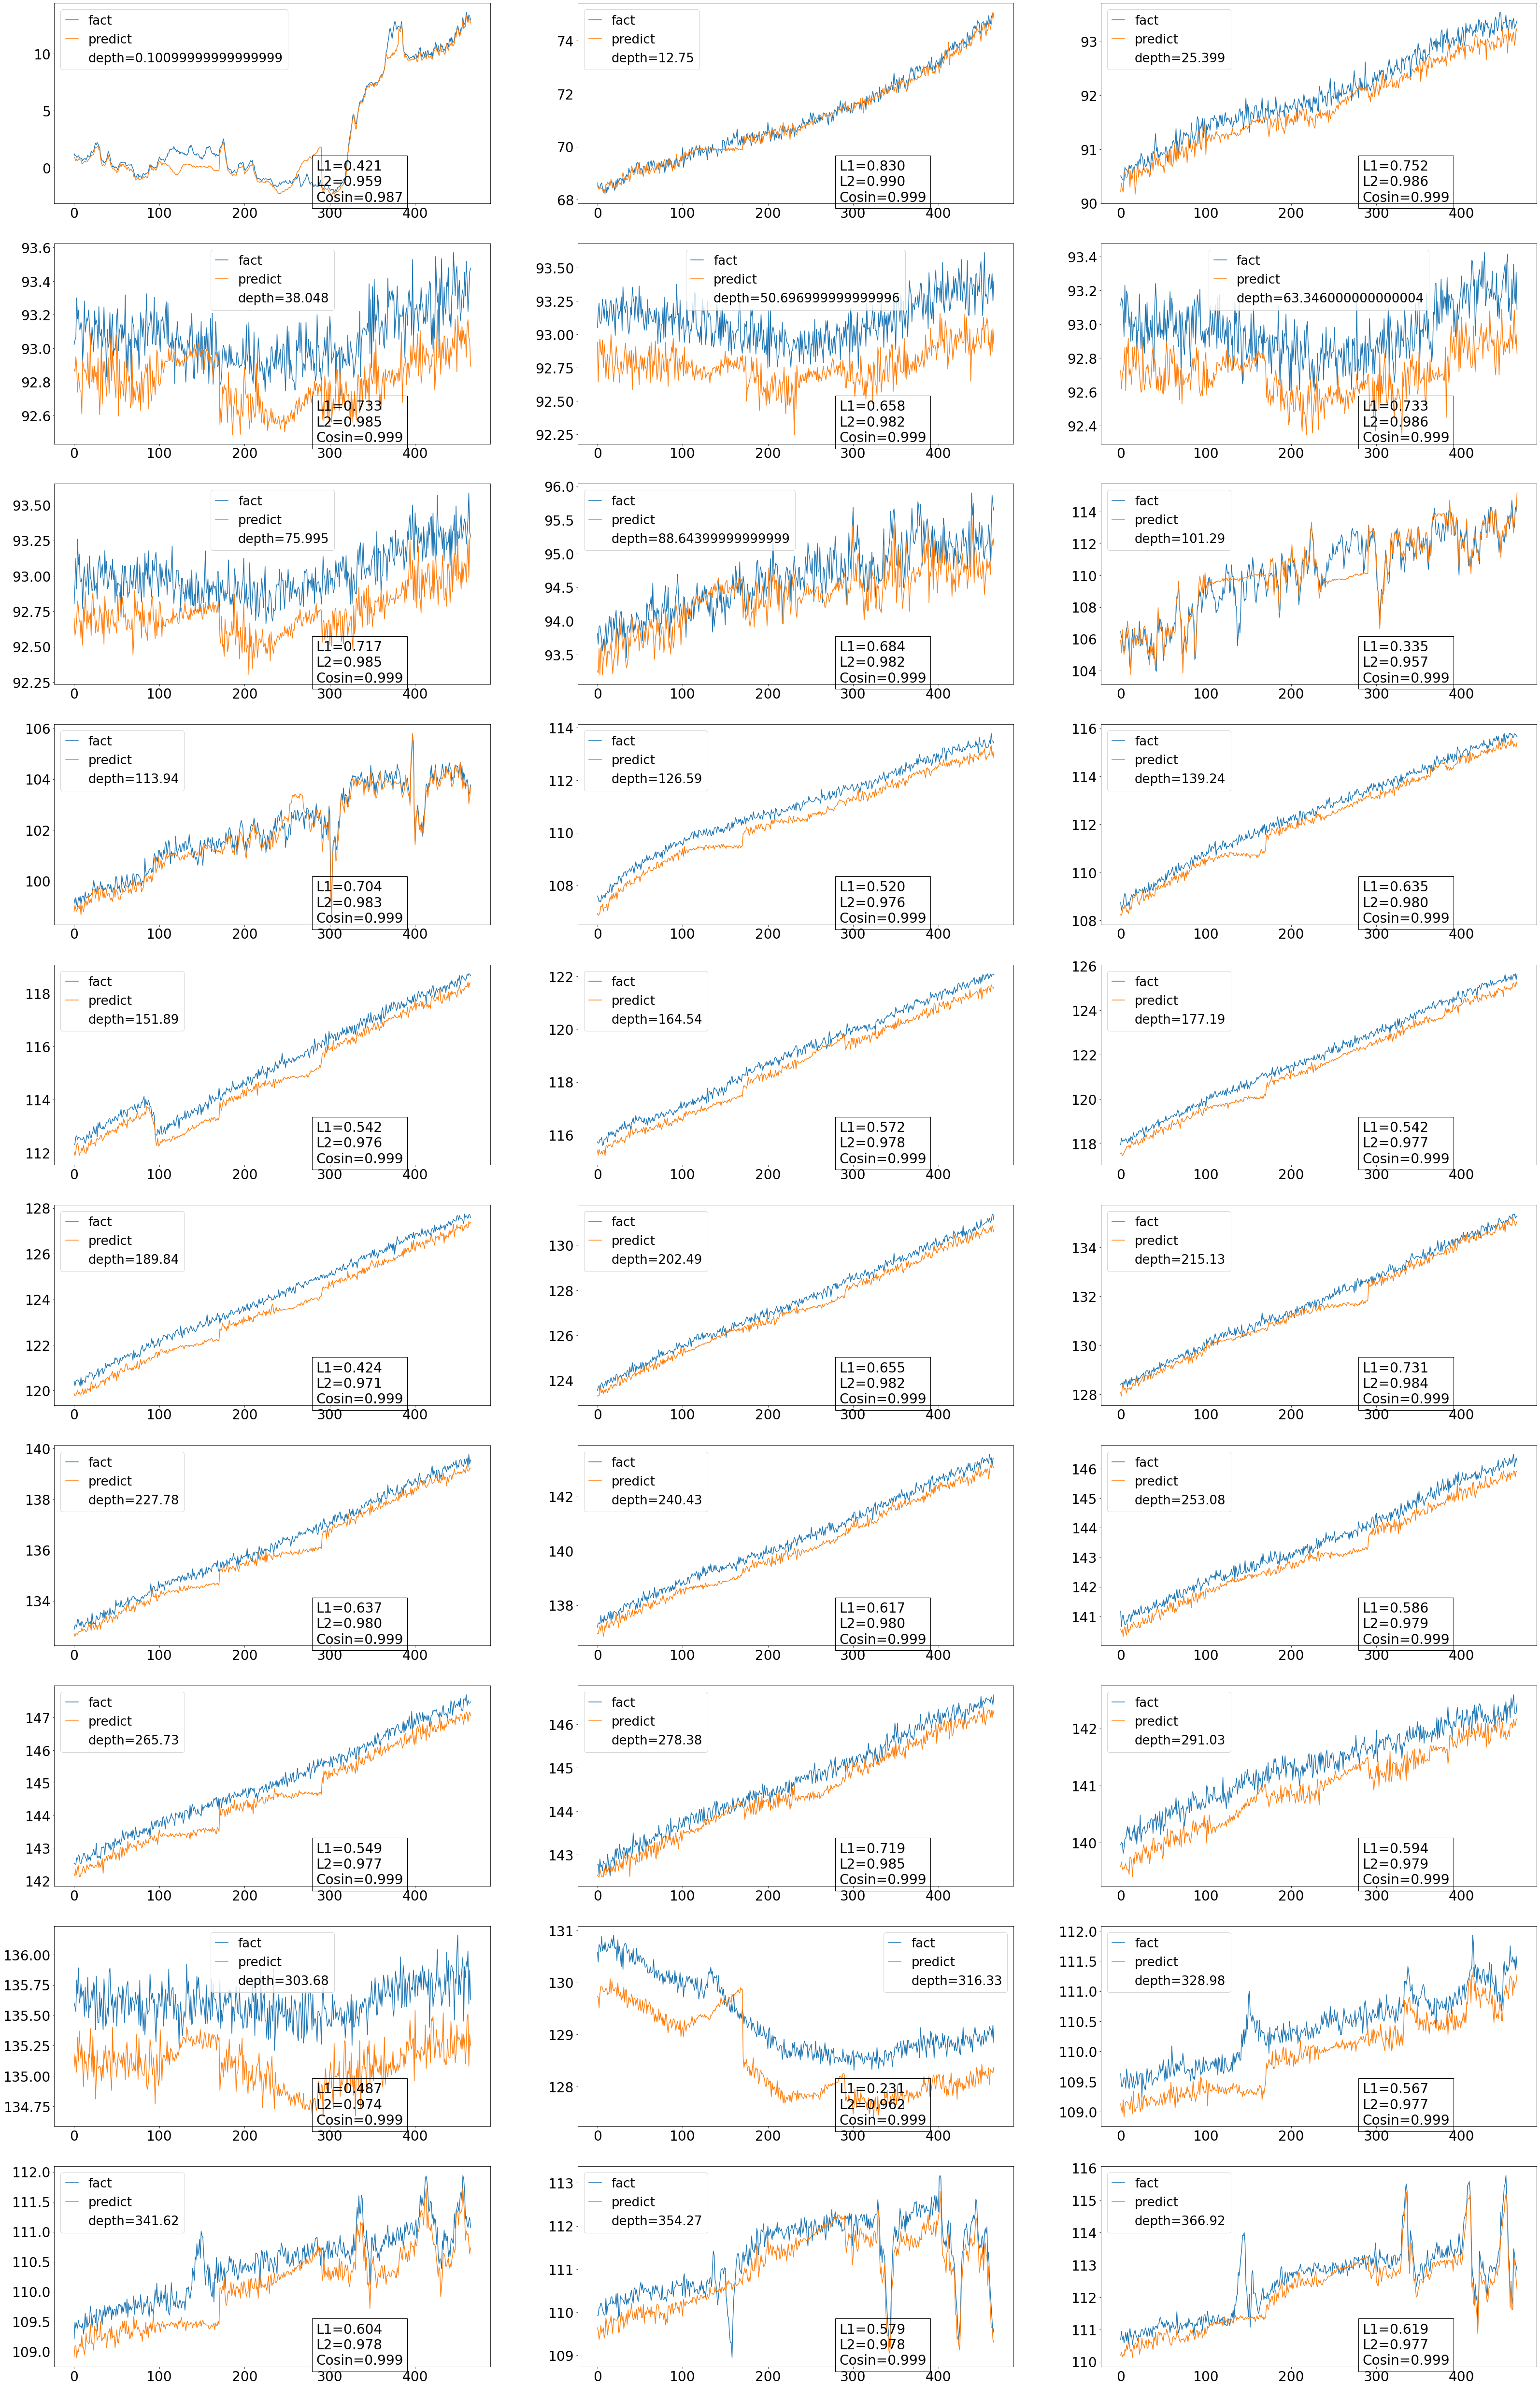

In [19]:
fct=forward['fact'].values.reshape(1, -1)
prd=forward['predict'].values.reshape(1, -1)
print('score for L1',1-(L1(fct,prd)[0][0])/len(forward))
print('score for L2',1-(L2(fct,prd)[0][0])/len(forward))
print('score for CS',1-(cs(fct,prd)[0][0])/len(forward))
draw_scores(forward).show()